# Week 7 Lab: Text Analytics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set() 

In [2]:
!head assign_wk7/bbc.csv

id,news,type
0,"UK economy facing 'major risks'
 
 The UK manufacturing sector will continue to face ""serious challenges"" over the next two years, the British Chamber of Commerce (BCC) has said.
 
 The group's quarterly survey of companies found exports had picked up in the last three months of 2004 to their best levels in eight years. The rise came despite exchange rates being cited as a major concern. However, the BCC found the whole UK economy still faced ""major risks"" and warned that growth is set to slow. It recently forecast economic growth will slow from more than 3% in 2004 to a little below 2.5% in both 2005 and 2006.
 
 Manufacturers' domestic sales growth fell back slightly in the quarter, the survey of 5,196 firms found. Employment in manufacturing also fell and job expectations were at their lowest level for a year.
 
 ""Despite some positive news for the export sector, there are worrying signs for manufacturing,"" the BCC said. ""These results reinforce our concern ov

In [3]:
# loading the data set
bbc_df = pd.read_csv('assign_wk7/bbc.csv')

In [4]:
bbc_df.head(10)

,id,news,type
0,0,UK economy facing 'major risks'\n \n The UK ma...,business
1,1,Aids and climate top Davos agenda\n \n Climate...,business
2,2,Asian quake hits European shares\n \n Shares i...,business
3,3,India power shares jump on debut\n \n Shares i...,business
4,4,Lacroix label bought by US firm\n \n Luxury go...,business
5,5,Insurance bosses plead guilty\n \n Another thr...,business
6,6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business
7,7,Parmalat to return to stockmarket\n \n Parmala...,business
8,8,WorldCom director admits lying\n \n The former...,business
9,9,Ebbers denies WorldCom fraud\n \n Former World...,business


## 1. Preparation of the text data for analysis

In [16]:
# view one news entry
print(bbc_df.iloc[3]['news'])

India power shares jump on debut
 
 Shares in India's largest power producer, National Thermal Power Corp (NTPC) have risen 13% on their stock market debut.
 
 The government's partial sell-off of NTPC is part of a controversial programme to privatise state-run firms. The 865 million share offer, a mix of new shares and sales by the government, raised 54bn rupees($1.2bn). It was India's second $1bn stock debut in three months, coming after the flotation by software firm Tata. The share offer was eleven times oversubscribed. "It is a good investment bet," said Suhas Naik, an investment analyst from ING Mutual Fund. "Power needs in India are set to rise and NTPC will benefit from that." Analysts say the success of the NTPC flotation would encourage the government to reduce stakes in more power companies. NTPC has said it will use the money from the share sale to feed the growing needs of the country's energy-starved economy. The firm is the largest utility company in India, and the sixth

In [5]:
# drop the column id
bbc_df.drop('id', axis=1, inplace=True)

In [6]:
bbc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   news    2225 non-null   object
 1   type    2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [8]:
# convert text to lowercase
bbc_df['clean_text'] = bbc_df.news.apply(lambda x: " ".join(x.lower() for x in x.split()))
bbc_df.head(10)

,news,type,clean_text
0,UK economy facing 'major risks'\n \n The UK ma...,business,uk economy facing 'major risks' the uk manufac...
1,Aids and climate top Davos agenda\n \n Climate...,business,aids and climate top davos agenda climate chan...
2,Asian quake hits European shares\n \n Shares i...,business,asian quake hits european shares shares in eur...
3,India power shares jump on debut\n \n Shares i...,business,india power shares jump on debut shares in ind...
4,Lacroix label bought by US firm\n \n Luxury go...,business,lacroix label bought by us firm luxury goods g...
5,Insurance bosses plead guilty\n \n Another thr...,business,insurance bosses plead guilty another three us...
6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business,turkey-iran mobile deal 'at risk' turkey's inv...
7,Parmalat to return to stockmarket\n \n Parmala...,business,"parmalat to return to stockmarket parmalat, th..."
8,WorldCom director admits lying\n \n The former...,business,worldcom director admits lying the former chie...
9,Ebbers denies WorldCom fraud\n \n Former World...,business,ebbers denies worldcom fraud former worldcom c...


In [9]:
# search for possible web and email addresses and remove them
bbc_df['clean_text'] = bbc_df.clean_text.str.replace('\S+@\S+','')
bbc_df['clean_text'] = bbc_df.clean_text.str.replace('http\S+','')
bbc_df['clean_text'] = bbc_df.clean_text.str.replace('\S+.com','')
bbc_df['clean_text'] = bbc_df.clean_text.str.replace('\S+.edu','') 

In [10]:
# remove punctuation
bbc_df['clean_text'] = bbc_df.clean_text.str.replace('[^\w\s]','')
bbc_df.head(10)

,news,type,clean_text
0,UK economy facing 'major risks'\n \n The UK ma...,business,uk economy facing major risks the uk manufactu...
1,Aids and climate top Davos agenda\n \n Climate...,business,aids and climate top davos agenda climate chan...
2,Asian quake hits European shares\n \n Shares i...,business,asian quake hits european shares shares in eur...
3,India power shares jump on debut\n \n Shares i...,business,india power shares jump on debut shares in ind...
4,Lacroix label bought by US firm\n \n Luxury go...,business,lacroix label bought by us firm luxury goods g...
5,Insurance bosses plead guilty\n \n Another thr...,business,insurance bosses plead guilty another three us...
6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business,turkeyiran mobile deal at risk turkeys investm...
7,Parmalat to return to stockmarket\n \n Parmala...,business,parmalat to return to stockmarket parmalat the...
8,WorldCom director admits lying\n \n The former...,business,director admits lying the former chief financ...
9,Ebbers denies WorldCom fraud\n \n Former World...,business,ebbers denies fraud former chief bernie ebbe...


In [11]:
# remove digits
bbc_df['clean_text'] = bbc_df.clean_text.str.replace('\d+','')

In [14]:
# import a list of stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/albertohernandez/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
# remove stopwords from text
bbc_df['clean_text'] = bbc_df.clean_text.apply(lambda x: " ".join(w for w in x.split() if w not in stop))
bbc_df.head(10)

,news,type,clean_text
0,UK economy facing 'major risks'\n \n The UK ma...,business,uk economy facing major risks uk manufacturing...
1,Aids and climate top Davos agenda\n \n Climate...,business,aids climate top davos agenda climate change f...
2,Asian quake hits European shares\n \n Shares i...,business,asian quake hits european shares shares europe...
3,India power shares jump on debut\n \n Shares i...,business,india power shares jump debut shares indias la...
4,Lacroix label bought by US firm\n \n Luxury go...,business,lacroix label bought us firm luxury goods grou...
5,Insurance bosses plead guilty\n \n Another thr...,business,insurance bosses plead guilty another three us...
6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business,turkeyiran mobile deal risk turkeys investment...
7,Parmalat to return to stockmarket\n \n Parmala...,business,parmalat return stockmarket parmalat italian p...
8,WorldCom director admits lying\n \n The former...,business,director admits lying former chief financial o...
9,Ebbers denies WorldCom fraud\n \n Former World...,business,ebbers denies fraud former chief bernie ebbers...


To prepare the text data for analysis, the id column was dropped from the dataframe. Additionally, the text was converted to lowercase, and any digits, punctuation, stopwords, web links, and email addresses were removed from the text.

## 2. Word Frequency and Lemmatization

### 2.1 Ten Most and Least Frequently Used Words

In [17]:
# generates a frequency dictionary
freq = pd.Series(' '.join(bbc_df.clean_text).split()).value_counts().to_dict()

In [18]:
# converts dictionary to list
list(freq.items())[:20]

[('said', 7244),
 ('mr', 3004),
 ('would', 2554),
 ('also', 2141),
 ('people', 1954),
 ('new', 1942),
 ('us', 1901),
 ('one', 1733),
 ('year', 1628),
 ('could', 1505),
 ('last', 1380),
 ('first', 1272),
 ('years', 1223),
 ('two', 1153),
 ('time', 1142),
 ('government', 1020),
 ('world', 998),
 ('e', 993),
 ('uk', 955),
 ('bn', 940)]

In [19]:
# removes every word whose length is not greater than one
bbc_df['clean_text'] = bbc_df.clean_text.apply(lambda x: " ".join(x for x in x.split() if len(x) > 1))

freq = pd.Series(' '.join(bbc_df.clean_text).split()).value_counts().to_dict()

# displays top 20 most frenquently used words
list(freq.items())[:20]

[('said', 7244),
 ('mr', 3004),
 ('would', 2554),
 ('also', 2141),
 ('people', 1954),
 ('new', 1942),
 ('us', 1901),
 ('one', 1733),
 ('year', 1628),
 ('could', 1505),
 ('last', 1380),
 ('first', 1272),
 ('years', 1223),
 ('two', 1153),
 ('time', 1142),
 ('government', 1020),
 ('world', 998),
 ('uk', 955),
 ('bn', 940),
 ('make', 917)]

In [39]:
# ten least frequently used words
list(freq.items())[-10:]

[('tysabritreated', 1),
 ('restating', 1),
 ('leukoencephalopathy', 1),
 ('areconsulting', 1),
 ('multifocal', 1),
 ('idecs', 1),
 ('irelandbased', 1),
 ('shihabeldin', 1),
 ('adnan', 1),
 ('mu', 1)]

### 2.2 Lemmatization

In [40]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

#establish the lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/albertohernandez/nltk_data...


In [41]:
# applies lemmatization to the news entries
bbc_df['clean_text'] = bbc_df.clean_text.apply(lambda x: " ".join(wordnet_lemmatizer.lemmatize(w) for w in x.split()))
bbc_df.head(10)

,news,type,clean_text
0,UK economy facing 'major risks'\n \n The UK ma...,business,uk economy facing major risk uk manufacturing ...
1,Aids and climate top Davos agenda\n \n Climate...,business,aid climate top davos agenda climate change fi...
2,Asian quake hits European shares\n \n Shares i...,business,asian quake hit european share share europe le...
3,India power shares jump on debut\n \n Shares i...,business,india power share jump debut share india large...
4,Lacroix label bought by US firm\n \n Luxury go...,business,lacroix label bought u firm luxury good group ...
5,Insurance bosses plead guilty\n \n Another thr...,business,insurance boss plead guilty another three u in...
6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business,turkeyiran mobile deal risk turkey investment ...
7,Parmalat to return to stockmarket\n \n Parmala...,business,parmalat return stockmarket parmalat italian p...
8,WorldCom director admits lying\n \n The former...,business,director admits lying former chief financial o...
9,Ebbers denies WorldCom fraud\n \n Former World...,business,ebbers denies fraud former chief bernie ebbers...


In [42]:
freq_2 = pd.Series(' '.join(bbc_df.clean_text).split()).value_counts().to_dict()

# displays top 10 most frenquently used words after applying lemmatization
list(freq_2.items())[:10]

[('said', 7244),
 ('mr', 3045),
 ('year', 2851),
 ('would', 2554),
 ('also', 2141),
 ('people', 2029),
 ('new', 1942),
 ('u', 1901),
 ('one', 1803),
 ('could', 1505)]

In [43]:
# displays top 10 least frenquently used words after applying lemmatization
list(freq_2.items())[-10:]

[('cassette', 1),
 ('grandma', 1),
 ('verbalicious', 1),
 ('stereophonics', 1),
 ('rapport', 1),
 ('sberbank', 1),
 ('amos', 1),
 ('royall', 1),
 ('blaisdon', 1),
 ('mu', 1)]

In [44]:
# once again removes every word whose length is not greater than one
bbc_df['clean_text'] = bbc_df.clean_text.apply(lambda x: " ".join(x for x in x.split() if len(x) > 1))


Interestingly, but not suprisingly, lemmatization changed both the contents and order of the most/least used words. For example, the original list of the ten most frequently used words had the word "year" in 9th place. After lemmatization, this word moved to 3rd place since both the words "year" and "years" share the same root word. 

In regard to the least frequently used words, the contents of the list were drastically altered. The original list conatined words like "leukoencephalopathy" and "restating", but after lemmatization, their frequency count increased, since they are now grouped with similar words. On the other hand, words such as "cassette" do not share a root word, so their frequency count was not increased.

## 3. Generating a World Cloud for the Text

In [45]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, max_words=200).generate_from_frequencies(freq_2)

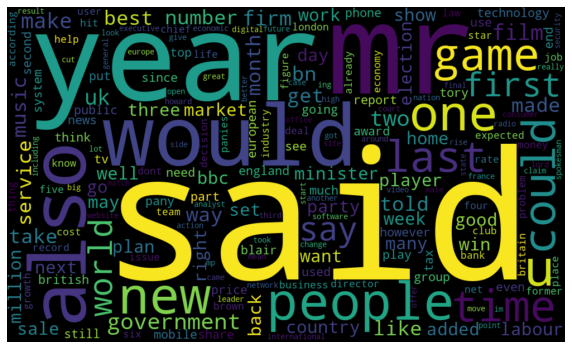

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

The generated word cloud reflects the contents of the top occurring words in the news entries. Therefore, words such as "government", "minister", and "market" are visible. Since the BBC is a news reporting agency, the word "said" is the boldest one in the image.

## 4. Generating n-grams and Parts of Speech Tagging

### 4.1 N-grams

In [47]:
# tokenization
tokens = ' '.join(bbc_df.clean_text).split()

In [48]:
# bigrams
ngrams_2 = nltk.bigrams(tokens)

In [49]:
# bigrams freq distribution
freq_2grams = pd.Series(ngrams_2).value_counts().to_dict()
list(freq_2grams.items())[:20]

[(('last', 'year'), 498),
 (('said', 'mr'), 363),
 (('told', 'bbc'), 347),
 (('mr', 'blair'), 334),
 (('prime', 'minister'), 317),
 (('mr', 'brown'), 256),
 (('chief', 'executive'), 204),
 (('said', 'would'), 193),
 (('last', 'week'), 188),
 (('tony', 'blair'), 186),
 (('mobile', 'phone'), 182),
 (('bbc', 'news'), 178),
 (('general', 'election'), 174),
 (('new', 'york'), 167),
 (('six', 'nation'), 162),
 (('bn', 'bn'), 162),
 (('year', 'ago'), 160),
 (('mr', 'howard'), 159),
 (('liberal', 'democrat'), 156),
 (('number', 'one'), 146)]

In [50]:
# creating the trigrams
ngrams_3 = nltk.trigrams(tokens)

In [51]:
# trigrams freq distribution
freq_3grams = pd.Series(ngrams_3).value_counts().to_dict()
list(freq_3grams.items())[:20]

[(('told', 'bbc', 'news'), 147),
 (('bbc', 'news', 'website'), 97),
 (('told', 'bbc', 'radio'), 76),
 (('leader', 'michael', 'howard'), 58),
 (('mr', 'blair', 'said'), 54),
 (('million', 'dollar', 'baby'), 52),
 (('radio', 'today', 'programme'), 49),
 (('told', 'bbc', 'sport'), 48),
 (('bbc', 'radio', 'today'), 47),
 (('tory', 'leader', 'michael'), 41),
 (('mr', 'howard', 'said'), 41),
 (('next', 'general', 'election'), 39),
 (('chancellor', 'gordon', 'brown'), 33),
 (('prime', 'minister', 'tony'), 32),
 (('leader', 'charles', 'kennedy'), 32),
 (('minister', 'tony', 'blair'), 32),
 (('digital', 'music', 'player'), 30),
 (('two', 'year', 'ago'), 28),
 (('mr', 'blair', 'told'), 27),
 (('world', 'number', 'one'), 27)]

The bigrams show tuples of words that are common, such as "mobile phone", "last week", and "prime minister". On the other hand, trigrams reveal groupings of words that are more specific to the text, and may not commonly occur outside of this particular corpus of text. For example, "bbc new website", and "told bbc sport" are such phrases. 

### 4.2 Parts of Speech Tagging

In [53]:
from nltk.tag import pos_tag

In [55]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/albertohernandez/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [56]:
# tagging
pos_tags = pos_tag(tokens)
pos_tags[:20]

[('uk', 'JJ'),
 ('economy', 'NN'),
 ('facing', 'VBG'),
 ('major', 'JJ'),
 ('risk', 'NN'),
 ('uk', 'IN'),
 ('manufacturing', 'VBG'),
 ('sector', 'NN'),
 ('continue', 'VBP'),
 ('face', 'VBP'),
 ('serious', 'JJ'),
 ('challenge', 'NN'),
 ('next', 'IN'),
 ('two', 'CD'),
 ('year', 'NN'),
 ('british', 'JJ'),
 ('chamber', 'NN'),
 ('merce', 'NN'),
 ('bcc', 'NN'),
 ('said', 'VBD')]

In [57]:
from collections import Counter

Counter([j for i,j in pos_tag(tokens)])

Counter({'JJ': 90251,
         'NN': 225618,
         'VBG': 19788,
         'IN': 7891,
         'VBP': 14085,
         'CD': 6674,
         'VBD': 34253,
         'NNS': 11796,
         'RBS': 129,
         'RB': 23162,
         'VBN': 12475,
         'VB': 10600,
         'JJS': 2392,
         'JJR': 1764,
         'NNP': 993,
         'RBR': 1051,
         'WP$': 120,
         'MD': 5333,
         'VBZ': 3096,
         'DT': 811,
         'CC': 281,
         'FW': 865,
         'PRP': 250,
         'RP': 387,
         'WP': 69,
         'WRB': 45,
         'WDT': 60,
         'EX': 69,
         'POS': 2,
         'NNPS': 3,
         'PRP$': 15,
         'PDT': 4,
         'TO': 2,
         'UH': 10})

The tags NN, RB, and JJ have the highest frequency counts and correspond to singular nouns, adverbs, and adjectives. This writing style is to be expected from a news reporting agency, since it deals with factual events while also trying to make them sensational, hence the high number of adverbs.

## 5. Creating a Topic Model of the Text

In [58]:
# a list of list of the lemmatized text
lem_ls = list(bbc_df.clean_text.apply(lambda x: list(x.split())))
print(lem_ls[:2])

[['uk', 'economy', 'facing', 'major', 'risk', 'uk', 'manufacturing', 'sector', 'continue', 'face', 'serious', 'challenge', 'next', 'two', 'year', 'british', 'chamber', 'merce', 'bcc', 'said', 'group', 'quarterly', 'survey', 'panies', 'found', 'export', 'picked', 'last', 'three', 'month', 'best', 'level', 'eight', 'year', 'rise', 'came', 'despite', 'exchange', 'rate', 'cited', 'major', 'concern', 'however', 'bcc', 'found', 'whole', 'uk', 'economy', 'still', 'faced', 'major', 'risk', 'warned', 'growth', 'set', 'slow', 'recently', 'forecast', 'economic', 'growth', 'slow', 'little', 'manufacturer', 'domestic', 'sale', 'growth', 'fell', 'back', 'slightly', 'quarter', 'survey', 'firm', 'found', 'employment', 'manufacturing', 'also', 'fell', 'job', 'expectation', 'lowest', 'level', 'year', 'despite', 'positive', 'news', 'export', 'sector', 'worrying', 'sign', 'manufacturing', 'bcc', 'said', 'result', 'reinforce', 'concern', 'sector', 'persistent', 'inability', 'sustain', 'recovery', 'outlook'

In [59]:
# Gensim
import gensim
import gensim.corpora as corpora

In [60]:
# Create  a dictionary
id2word = corpora.Dictionary(lem_ls)

# Term Document Frequency Corpus
corpus = [id2word.doc2bow(post) for post in lem_ls]

In [61]:
# CoherenceModel used to calculate coherence score
from gensim.models import CoherenceModel

In [62]:
# range of 2 to 15 topics
scores = []
for i in range(2,15):
    print(f'Calcuting for {i} topics')
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=i, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
    # compute the coherence score
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=lem_ls, 
                                         dictionary=id2word, 
                                         coherence='c_v')

    # retreive the coherence_scores
    coherence_lda = coherence_model_lda.get_coherence()
    
    scores.append((i,coherence_lda))


Calcuting for 2 topics


/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.o

Calcuting for 3 topics


/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.o

Calcuting for 4 topics


/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.o

Calcuting for 5 topics


/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.o

Calcuting for 6 topics


/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.o

Calcuting for 7 topics


/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.o

Calcuting for 8 topics


/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.o

Calcuting for 9 topics


/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.o

Calcuting for 10 topics


/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.o

Calcuting for 11 topics


/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.o

Calcuting for 12 topics


/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.o

Calcuting for 13 topics


/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.o

Calcuting for 14 topics


/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.o

In [63]:
scores

[(2, 0.30847277617784086),
 (3, 0.3459117931882636),
 (4, 0.4283725462703542),
 (5, 0.4567324292687741),
 (6, 0.5054262215509322),
 (7, 0.5264981906306077),
 (8, 0.4883111476660447),
 (9, 0.515386672406134),
 (10, 0.5200405486945853),
 (11, 0.47948047476513955),
 (12, 0.5149597243071345),
 (13, 0.4888705993330795),
 (14, 0.5585379651371208)]

In [64]:
bf_lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=14, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.o

In [65]:
# Print the Keyword in the 14 topics
print(bf_lda_model.print_topics())

[(0, '0.019*"year" + 0.016*"said" + 0.013*"sale" + 0.012*"market" + 0.012*"bn" + 0.009*"price" + 0.008*"share" + 0.007*"last" + 0.007*"firm" + 0.006*"analyst"'), (1, '0.020*"phone" + 0.019*"mobile" + 0.018*"said" + 0.013*"people" + 0.011*"service" + 0.011*"system" + 0.009*"network" + 0.008*"could" + 0.007*"firm" + 0.007*"use"'), (2, '0.027*"music" + 0.019*"award" + 0.017*"best" + 0.015*"show" + 0.015*"song" + 0.014*"band" + 0.012*"year" + 0.012*"album" + 0.009*"artist" + 0.008*"singer"'), (3, '0.016*"game" + 0.011*"said" + 0.007*"first" + 0.007*"one" + 0.007*"time" + 0.007*"year" + 0.006*"play" + 0.006*"win" + 0.005*"two" + 0.005*"also"'), (4, '0.022*"poster" + 0.022*"fa" + 0.021*"spyware" + 0.012*"republic" + 0.011*"fiat" + 0.009*"israel" + 0.008*"switzerland" + 0.008*"rover" + 0.006*"orchestra" + 0.006*"antivirus"'), (5, '0.029*"seed" + 0.017*"chart" + 0.009*"nuclear" + 0.009*"project" + 0.005*"office" + 0.005*"dam" + 0.005*"box" + 0.004*"sister" + 0.004*"sale" + 0.004*"three"'), (6,

An optimal number of 14 topics indicates that the focus of a typical news story is not exclusive, and may incorporate various topics. Additionally, it indicates that the news stories tend to fall into one of these 14 topics. For each topic, the top ten most important words are moderately coherent, with the model receiving a coherence score of .559. Therefore, one can vaguely deduce the meaning of each topic. For example, topic 12 is concerned with a sporting event that involved england, wales, and france. One must examine each word in a topic to infer the overall meaning, since looking at the top word alone does not suffice.

In [67]:
# Packages necessary to support the visualization of the topic model
import pyLDAvis

In [69]:
import pyLDAvis.gensim

In [70]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(bf_lda_model, corpus, id2word)

/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/albertohernandez/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [71]:
# Save the visualization to a html file
pyLDAvis.save_html(LDAvis_prepared,'topic_model_visualization.html')

Based on a visualization of the model, it appears that the 14 topics fall into four groups: economics, sports, technology, and music/film. The majority of the topics fall into the first of these groups. It is also within this group that the most overlap occurs. This overlap might be attribuated to the fact that the topics in these groups contain the same lemmatized words.

Overall, the news articles have a high probability of being represented by topic 1 or 2, which seem to deal with a governmental issue in the UK, and a sporting event, respectively.